<a href="https://colab.research.google.com/github/Alan0520/IC_HW4_HW4_noise_and_filtering_Software/blob/main/HW4_noise_and_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Noise and filtering
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_02b_filtering_and_resampling/noise_and_filtering.ipynb)



In [34]:
# to run in google colab
import sys
if 'google.colab' in sys.modules:
    import subprocess
    subprocess.call('apt-get install subversion'.split())
    subprocess.call('svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_02b_filtering_and_resampling/Tour_Eiffel.jpg'.split())



In [35]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import csv
figsize = (10,10)


Get basic image:



In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


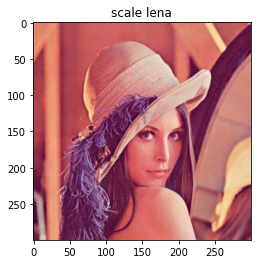

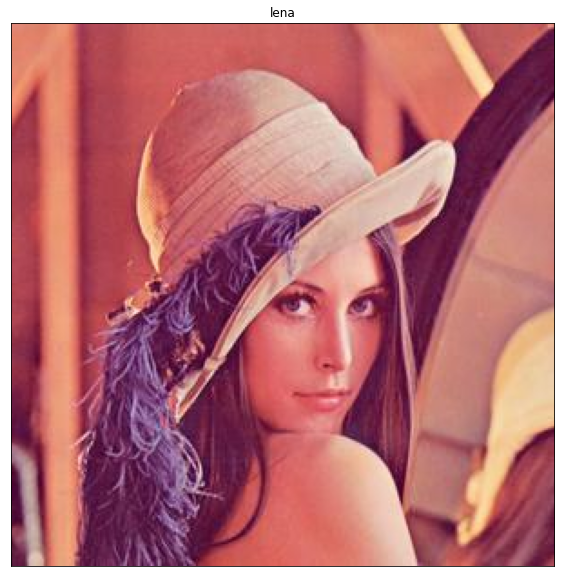

------------------------------------------------------------------------------------


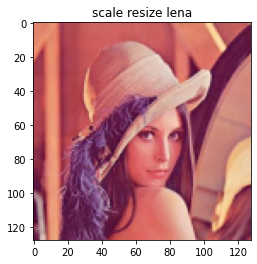

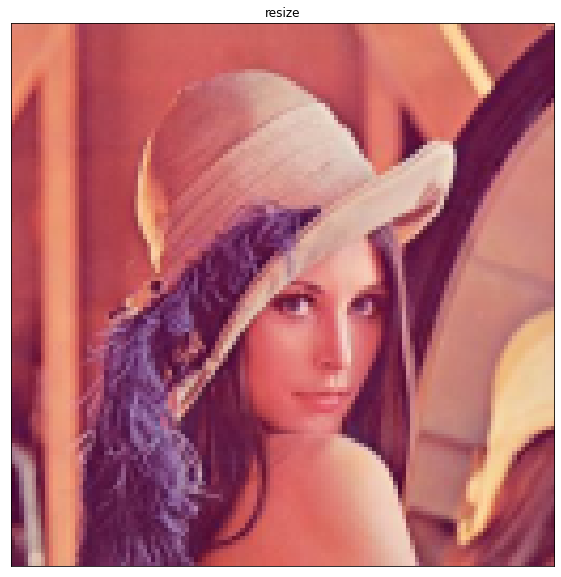

------------------------------------------------------------------------------------


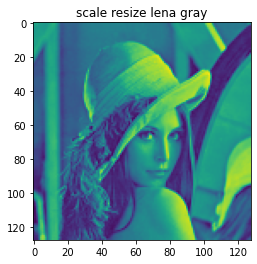

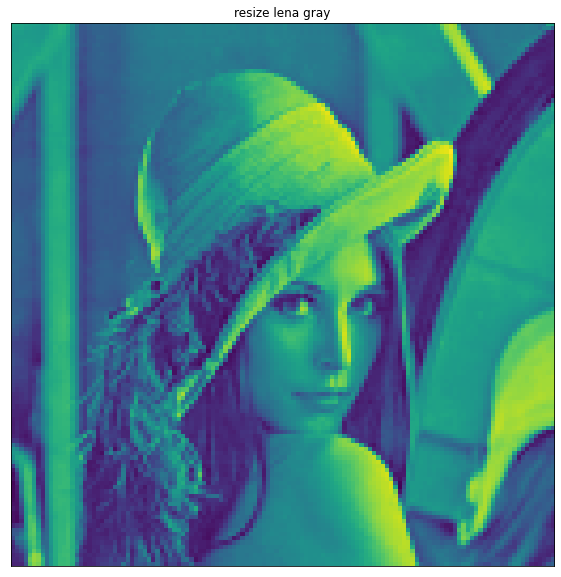

True

In [37]:
#Read lena
img3 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/lena.jpg")
img3_bgrtorgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.title("scale lena")
imgplot = plt.imshow(img3_bgrtorgb)
plot_im(img3_bgrtorgb, "lena")

print("------------------------------------------------------------------------------------")
#3_Resize the image into 128x128
resize_img3 = cv2.resize(img3_bgrtorgb,(128, 128),interpolation=cv2.INTER_AREA) #如果是要縮小圖片的話，通常 INTER_AREA 使用效果較佳。
plt.title("scale resize lena")
imgplot = plt.imshow(resize_img3)
plot_im(resize_img3,"resize")
#save
resize_img3_bgrtorgb =cv2.cvtColor(resize_img3, cv2.COLOR_BGR2RGB)
cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/lena resize.jpg" , resize_img3_bgrtorgb)

print("------------------------------------------------------------------------------------")
#2_Convert RGB image to gray scale
resize_img3_bgrtogray =cv2.cvtColor(resize_img3, cv2.COLOR_BGR2GRAY)
plt.title("scale resize lena gray")
imgplot = plt.imshow(resize_img3_bgrtogray)
plot_im(resize_img3_bgrtogray,"resize lena gray")
#save
cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/resize lena gray.jpg" , resize_img3_bgrtogray)
#cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/resize lena gray.dat" , resize_img3_bgrtogray)

## Median filter



In [38]:


def median_filter(img, k_sz):
    res = cv2.medianBlur(img, k_sz)
    #plot_im(res, "median filter with kernel_size="+str(k_sz))


median_filter(img, 5)



## Noise addition func



In [39]:


def gauss_noise(image, gauss_var=1000):
    mean = 0
    sigma = gauss_var**0.5
    gauss = np.random.normal(mean, sigma, image.shape)

    res = image + gauss
    noisy = np.clip(res,0,255).astype(np.uint8)
    return noisy

def s_and_p_noise(image, s_p_ratio=0.02):
    # this implementation is not entirely correct because it assumes that
    # only 0 OR 255 values are S&P noise.
    out = np.copy(image)

    # Salt mode
    mask = np.random.rand(image.shape[0],image.shape[1]) <= s_p_ratio/2
    out[mask] = 255

    # Pepper mode
    mask = np.random.rand(image.shape[0],image.shape[1]) <= s_p_ratio/2
    out[mask] = 0
    return out




## Salt and pepper noise test



# MIKE_MY_HW_Salt ans pepper noise test and median filter

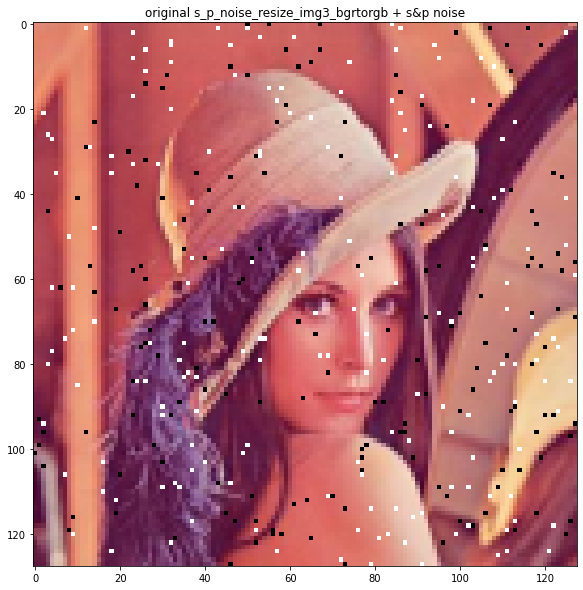

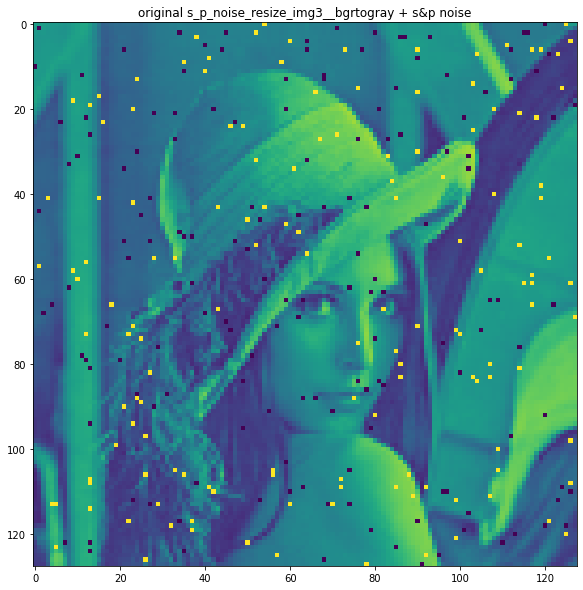

True

In [40]:
s_p_noise_resize_img3 = s_and_p_noise(resize_img3, s_p_ratio=0.02)
plt.figure(figsize=figsize)
plt.imshow(s_p_noise_resize_img3)
plt.title('original s_p_noise_resize_img3_bgrtorgb + s&p noise')
plt.show()

s_p_noise_resize_img3_bgrtogray = s_and_p_noise(resize_img3_bgrtogray, s_p_ratio=0.02)
plt.figure(figsize=figsize)
plt.imshow(s_p_noise_resize_img3_bgrtogray)
plt.title('original s_p_noise_resize_img3__bgrtogray + s&p noise')
plt.show()
cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/resize lena gray noise.jpg" , s_p_noise_resize_img3_bgrtogray)

In [41]:
median_filter(s_p_noise_resize_img3_bgrtogray, 3)
median_filter(s_p_noise_resize_img3_bgrtogray, 5)



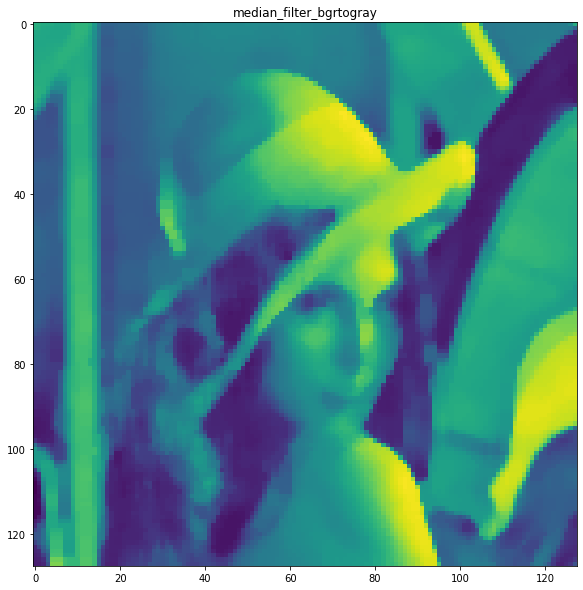

True

In [42]:
median_filter_bgrtogray =cv2.medianBlur(s_p_noise_resize_img3_bgrtogray, 5)
plt.figure(figsize=figsize)
plt.imshow(median_filter_bgrtogray)
plt.title('median_filter_bgrtogray')
plt.show()
cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/median_filter_bgrtogray.jpg" , median_filter_bgrtogray)